# Credit Card Default Analysis 

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, plot_confusion_matrix, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



#from sklearn.svm import SVC
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
#from xgboost import XGBClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 


import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


In [70]:
import xgboost as xgb
from xgboost import XGBClassifier

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("UCI_Credit_Card.csv")
df.shape

(30000, 25)

##  Understanding the Data

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
df.loc[0]

ID                                1.0
LIMIT_BAL                     20000.0
SEX                               2.0
EDUCATION                         2.0
MARRIAGE                          1.0
AGE                              24.0
PAY_0                             2.0
PAY_2                             2.0
PAY_3                            -1.0
PAY_4                            -1.0
PAY_5                            -2.0
PAY_6                            -2.0
BILL_AMT1                      3913.0
BILL_AMT2                      3102.0
BILL_AMT3                       689.0
BILL_AMT4                         0.0
BILL_AMT5                         0.0
BILL_AMT6                         0.0
PAY_AMT1                          0.0
PAY_AMT2                        689.0
PAY_AMT3                          0.0
PAY_AMT4                          0.0
PAY_AMT5                          0.0
PAY_AMT6                          0.0
default.payment.next.month        1.0
Name: 0, dtype: float64

In [10]:
pay = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


In [11]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [12]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

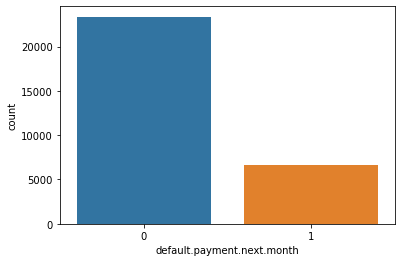

In [13]:
sns.countplot(x = df['default.payment.next.month'])

## About 22% customers had default payment next month

##  Data Cleanning

### (1) Check missing values, column type and column names

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Change inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NMO'

In [15]:
df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'DEF_PAY_NMO'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

### Check duplicate records

In [16]:
df.duplicated(subset = 'ID').any()

False

 so no duplicates

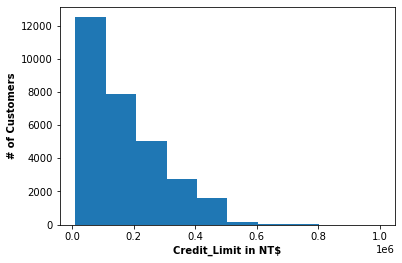

In [17]:
# Use histogram to view the distribution of credit limit

plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [18]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


No data is extremly unresonable in these columns

In [19]:
# Save processed csv file for part 2 - modeling
df.to_csv("UCI_Credit_Card_Processed.csv", index=None)

### Check categorical columns ('SEX',	'EDUCATION' and	'MARRIAGE')

In [20]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

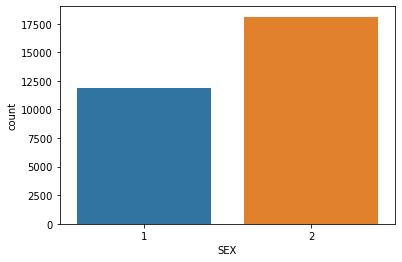

In [21]:
sns.countplot(x = 'SEX' ,data = df)

In [22]:
df["SEX"].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

SEX column's distribution. 1: male; 2: female
No undocumented 'SEX' code

In [23]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [24]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

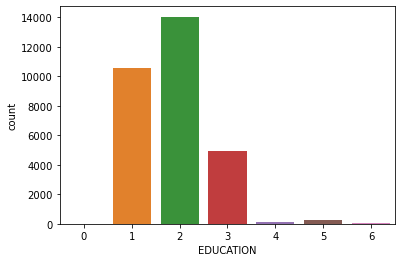

In [25]:
sns.countplot(x = 'EDUCATION' ,data = df)

 
 0 = others , 1 = graduate school,  2 = university,  3 = high school,

In [26]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [27]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

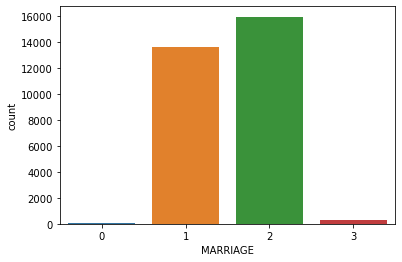

In [28]:
sns.countplot(x = 'MARRIAGE' ,data = df)

From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others)

In [29]:
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [30]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

In [31]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
df.set_index('ID', inplace = True)

In [33]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [34]:
pd.crosstab(index=df['DEF_PAY_NMO'],columns = df['SEX'], normalize = 'columns')

SEX,1,2
DEF_PAY_NMO,,
0,0.758328,0.792237
1,0.241672,0.207763


In [35]:
x = [1,2]
y1 = [75.8,79.2]
y2 = [24.16,20.77]

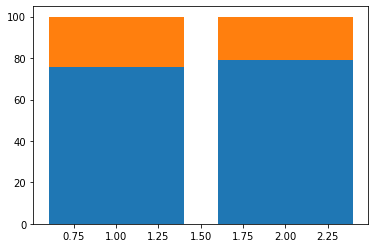

In [36]:
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
plt.show()

In [37]:
features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

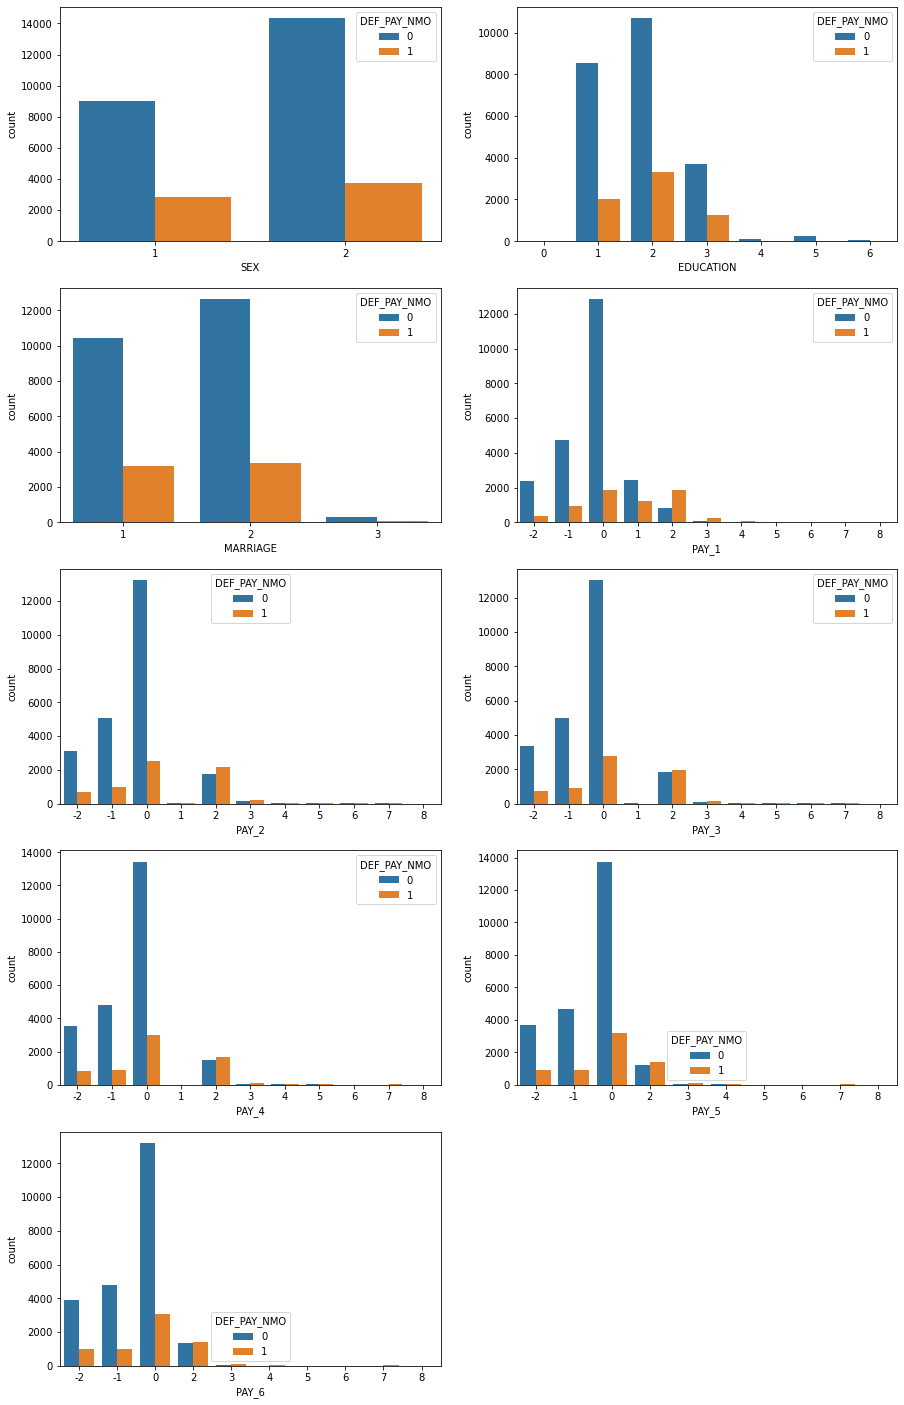

In [38]:
plt.figure(figsize=(15,25))
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(i[1],hue='DEF_PAY_NMO',data = df)
    

In [39]:
x1 = list(df[df['DEF_PAY_NMO'] == 1]['LIMIT_BAL'])
x2 = list(df[df['DEF_PAY_NMO'] == 0]['LIMIT_BAL'])

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')

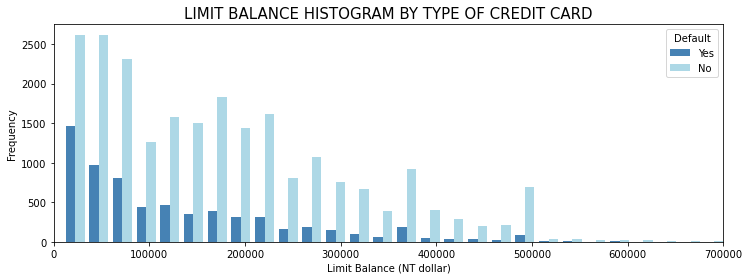

In [40]:
plt.figure(figsize=(12,4))
plt.hist([x1, x2], bins = 40,  color=['steelblue', 'lightblue'])
plt.xlim([0,700000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)


In [41]:
corr = df.corr()

In [42]:
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.111012,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.028522,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.131988,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.111012,-0.028522,-0.131988,1.000000,-0.412001,0.018557,0.023620,0.032399,0.031831,0.034377,...,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.175061,-0.412001,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.018557,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.023620,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032399,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.031831,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.034377,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


<AxesSubplot:>

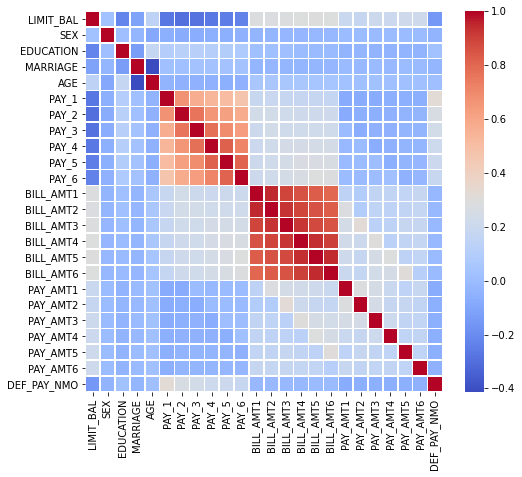

In [43]:
plt.figure(figsize=(8, 7))
sns.heatmap(corr,cmap="coolwarm", linewidths=.5)

In [44]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

In [45]:
def compare_default_across_features(df, col_name, dict_label={}):
    

    # Create a cross-tab and rename indices for readability
    cross_tab = pd.crosstab(df["DEF_PAY_NMO"], df[col_name], margins=True, normalize=False)

    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label

    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

    # Plot a bar graph showing population distribution by the feature values
    plt.figure(figsize=(10, 5))
    i = cross_tab.shape[1] - 1
    cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
    plt.title("Population Distribution by " + col_name, fontsize=20)
    plt.ylabel("count")
    plt.show()

    # Normalise the cross-tab and print it
    cross_tab_norm = cross_tab / cross_tab.loc["All"]
    display(cross_tab_norm)

    # Plot a bar graph showing population distribution by the feature values separating the defaulters and non-defaulters
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col_name, hue="DEF_PAY_NMO", data=df)
    plt.title("Population Distribution by " + col_name + " with default and non-default",fontsize=20)

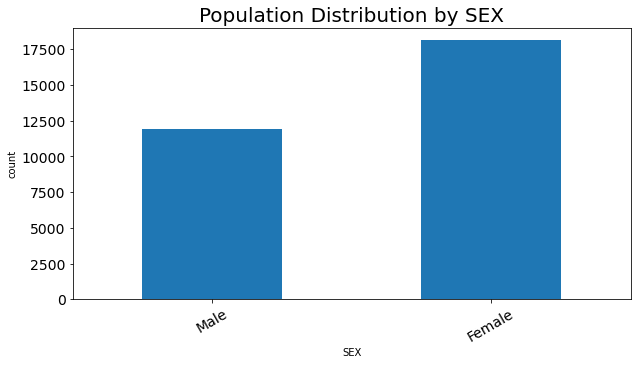

SEX,Male,Female,All
DEF_PAY_NMO,,,
Non-default proportion,0.758328,0.792237,0.7788
Default proportion,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


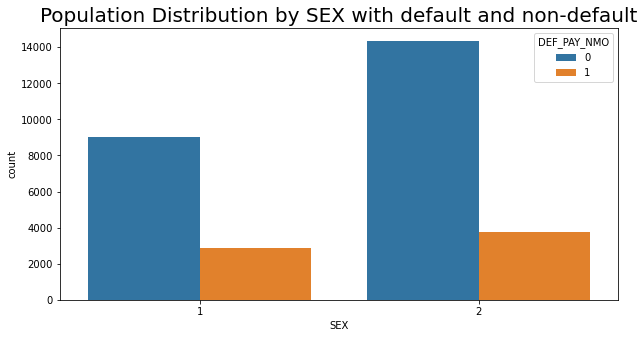

In [46]:
compare_default_across_features(df,'SEX',{1: "Male", 2: "Female"})

Although there are more female credit card holders, the default proportion among men is higher.

## Education

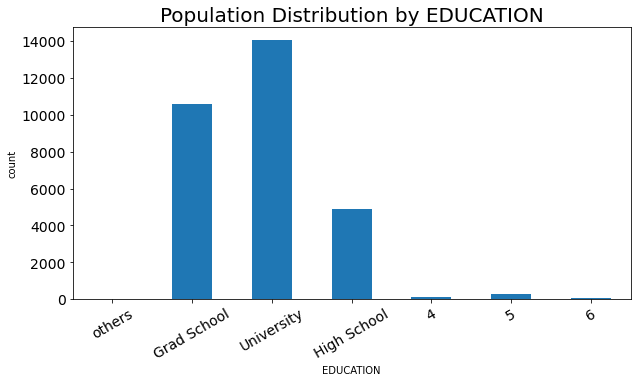

EDUCATION,others,Grad School,University,High School,4,5,6,All
DEF_PAY_NMO,,,,,,,,
Non-default proportion,1.0,0.807652,0.762651,0.748424,0.943089,0.935714,0.843137,0.7788
Default proportion,0.0,0.192348,0.237349,0.251576,0.056911,0.064286,0.156863,0.2212
All,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


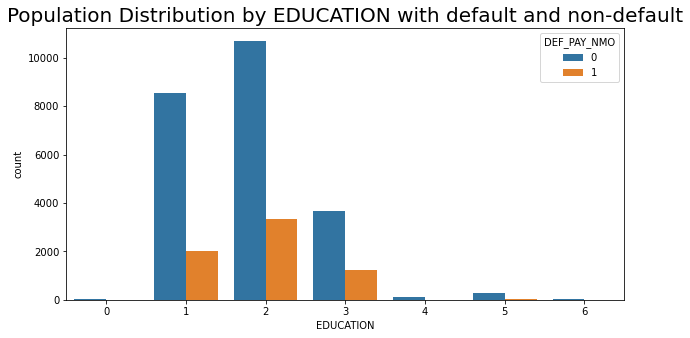

In [47]:
compare_default_across_features(df,'EDUCATION',{0: "others",1: "Grad School",2: "University",3: "High School"})

A quick glance shows that the default proportion decreases with higher education level. 
This would agree with my intuition because more educated people tend to have higher paying jobs which might make 
it easier for them to pay back their debts.

## Marriage

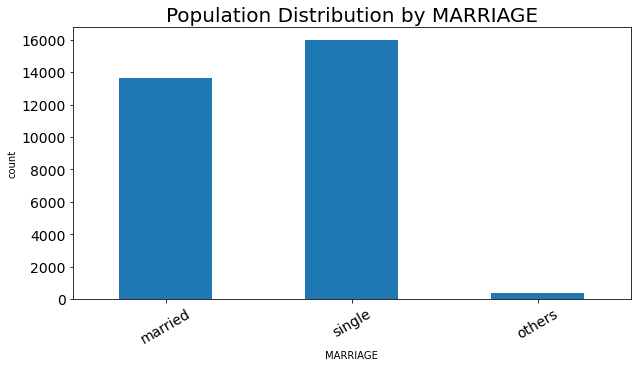

MARRIAGE,married,single,others,All
DEF_PAY_NMO,,,,
Non-default proportion,0.765283,0.790717,0.763926,0.7788
Default proportion,0.234717,0.209283,0.236074,0.2212
All,1.000000,1.000000,1.000000,1.0000


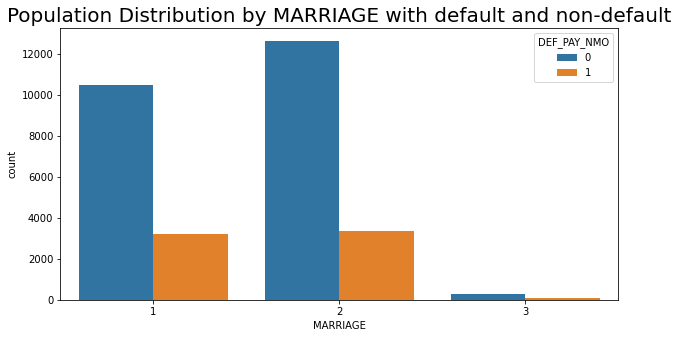

In [48]:
compare_default_across_features(df,'MARRIAGE',{1:'married', 2:'single', 3:'others'})

Married people have higher default proportions than single folks.

Since age is a discrete variable,so i'll creare bins.

In [49]:
# Creating the age bins
df['age_group'] = df['AGE']//10
age_group_names = [str(i) + '0s' for i in range(2,8)]
age_dict = dict(zip(range(2,8), age_group_names))


In [50]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,age_group
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2
3,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,3
4,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,3
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,5


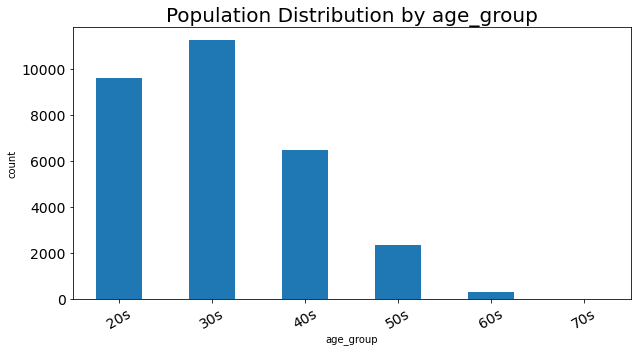

age_group,20s,30s,40s,50s,60s,70s,All
DEF_PAY_NMO,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


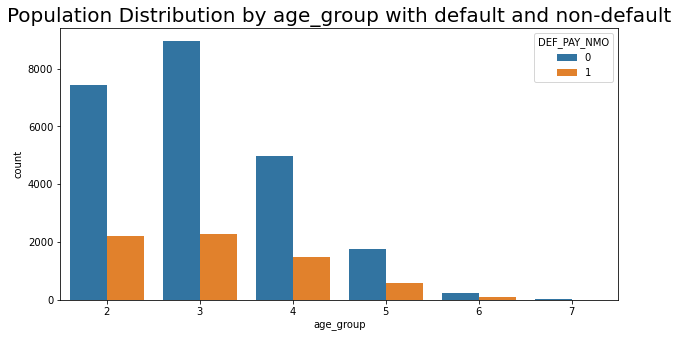

In [51]:
compare_default_across_features(df,'age_group',age_dict)

In [52]:
pay_hist = df[['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEF_PAY_NMO']]

<AxesSubplot:xlabel='PAY_6', ylabel='count'>

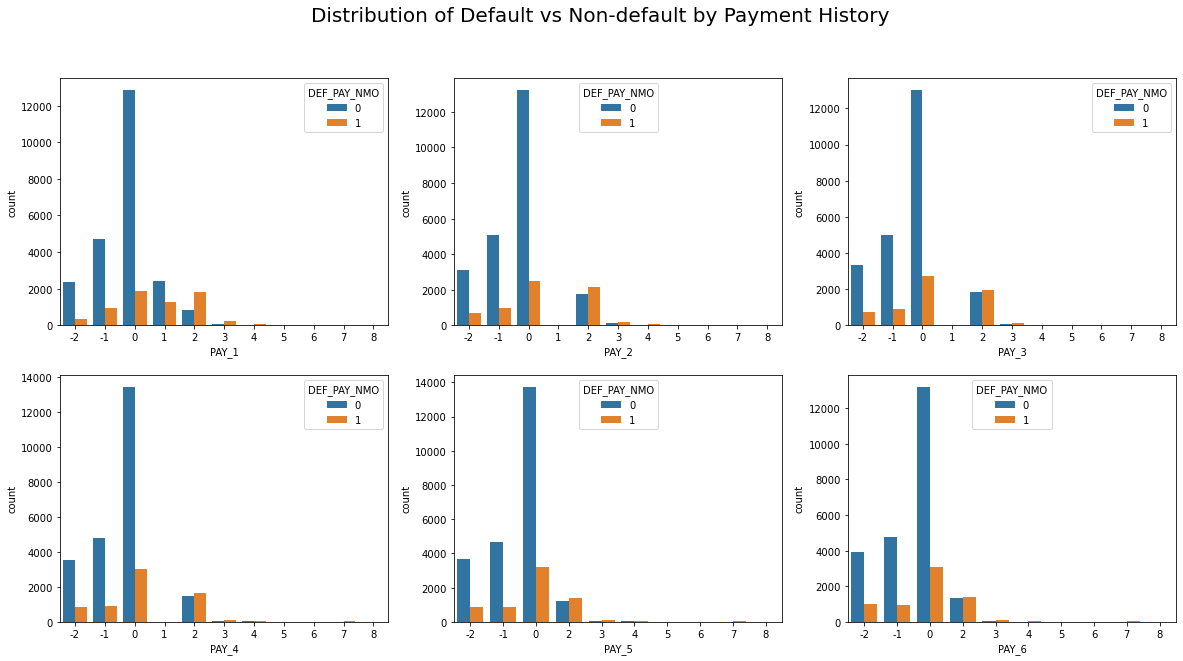

In [53]:
f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Default vs Non-default by Payment History', size=20)
sns.countplot(x='PAY_1', hue="DEF_PAY_NMO", data=pay_hist, ax=axes[0,0])
sns.countplot(x="PAY_2", hue="DEF_PAY_NMO", data=pay_hist, ax=axes[0,1])
sns.countplot(x="PAY_3", hue="DEF_PAY_NMO", data=pay_hist, ax=axes[0,2])
sns.countplot(x="PAY_4", hue="DEF_PAY_NMO", data=pay_hist, ax=axes[1,0])
sns.countplot(x="PAY_5", hue="DEF_PAY_NMO", data=pay_hist, ax=axes[1,1])
sns.countplot(x="PAY_6", hue="DEF_PAY_NMO", data=pay_hist, ax=axes[1,2])

if the person has defaulted for 2 months or more in the past two months, there is a very high chance of them defaulting. 

In [54]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(60,50))
g = sns.heatmap(corr,annot=True,cmap="coolwarm",annot_kws={"size":30}, linewidths=.5)
ax.tick_params(labelsize=30)
ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=45);

# Feature Engineering
## Adding New Features

Based on my understanding from EDA , i engineerd few features

In [55]:
df['Avg_default'] = df.iloc[:,5:11].sum(axis=1) / 6    #average default history

In [56]:
df['Avg_bill'] =   df.iloc[:,11:17].sum(axis=1) / 6   #average bill amount

In [57]:
df['Bill_Bal_ratio']  = df['Avg_bill']/df['LIMIT_BAL']   # avg bill divided by limit balance

In [58]:
df.groupby('DEF_PAY_NMO')['Avg_default'].mean()

DEF_PAY_NMO
0   -0.330023
1    0.337176
Name: Avg_default, dtype: float64

In [59]:
df.groupby('DEF_PAY_NMO')['LIMIT_BAL'].mean()

DEF_PAY_NMO
0    178099.726074
1    130109.656420
Name: LIMIT_BAL, dtype: float64

In [60]:
df.groupby('DEF_PAY_NMO')['Bill_Bal_ratio'].mean()

DEF_PAY_NMO
0    0.351391
1    0.449298
Name: Bill_Bal_ratio, dtype: float64

# Feature Selection, Scaling, Splitting and Balancing the Data

In [61]:
def Scale_Split_Balance(df, features, target='DEF_PAY_NMO', scaled=False, balanced=False, test_size=0.2, random_state=1):
    '''
    This function takes in a dataframe, the feature variables, the target variables
    and then splits the data with the user having the option to scale and balance the data
    and set values for the split proportion and the random seed.
    '''
    # Resampling methods
    random_os = RandomOverSampler() # oversampling
    smote = SMOTE() # smote

    X, y = df[features], df[target]

    # Checking if X needs to be scaled
    if scaled == True:
        X_sc = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
    else:
        X_sc = X
    
    # Executing sklearn's train-test split
    X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=test_size, stratify=y, random_state=random_state)
    
    # Checking if training data needs to be balanced
    if balanced == 'random_os':
        X_sc_train_rs, y_sc_train_rs = random_os.fit_resample(X_sc_train, y_train)
    elif balanced == 'smote':
        X_sc_train_rs, y_sc_train_rs = smote.fit_resample(X_sc_train, y_train)
    else:
        X_sc_train_rs, y_sc_train_rs = X_sc_train, y_train        
        
    return X_sc_train_rs, X_sc_test, y_sc_train_rs, y_test

In [62]:
features_1 = list(df.columns[:24])
X1_train, X1_test, y_train, y_test = Scale_Split_Balance(df, features_1)

In [63]:
print(features_1)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEF_PAY_NMO']


In [64]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,age_group,Avg_default,Avg_bill,Bill_Bal_ratio
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,1,2,-0.333333,1284.000000,0.064200
2,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,2,0.500000,2846.166667,0.023718
3,90000.0,2,2,2,34,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,3,0.000000,16942.166667,0.188246
4,50000.0,2,2,1,37,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,3,0.000000,38555.666667,0.771113
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,5,-0.333333,18223.166667,0.364463


In [65]:
df = df.drop(columns='age_group')

In [66]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO,Avg_default,Avg_bill,Bill_Bal_ratio
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,-0.333333,1284.000000,0.064200
2,120000.0,2,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.500000,2846.166667,0.023718
3,90000.0,2,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.000000,16942.166667,0.188246
4,50000.0,2,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.000000,38555.666667,0.771113
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-0.333333,18223.166667,0.364463


In [67]:
df.to_csv("UCI_Credit_Card_Processed_feature_engineered.csv", index=None)

# Modeling

# with  features1

In [68]:
X = df.drop(columns=['DEF_PAY_NMO'])

In [69]:
features_1  # without feature engineered

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DEF_PAY_NMO']

In [75]:
features_1.pop(-1)

'DEF_PAY_NMO'

In [76]:
len(features_1)

23

In [74]:
feature_eng = df.columns  # has feature engineered columns

In [75]:
feature_eng

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO', 'Avg_default', 'Avg_bill', 'Bill_Bal_ratio'],
      dtype='object')

In [76]:
feature_eng = feature_eng.drop( 'DEF_PAY_NMO')

In [77]:
len(feature_eng)

26

0    0.7788
1    0.2212
Name: DEF_PAY_NMO, dtype: float64


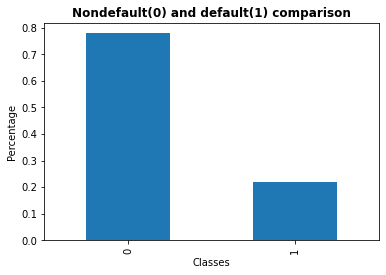

In [78]:
# Check target classes balancec
cla_bal = df['DEF_PAY_NMO'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

With typical default classification problems, we expect imbalanced classes as we know most people will not default. This dataset is also imbalanced, with 78% non-default vs. 22% default.

# Logistic Regregression

In [103]:
clf_lr = LogisticRegression()

## Random oversampling

In [104]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='random_os')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7244563972929172


[[3280 1393]
 [ 483  844]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4673
           1       0.38      0.64      0.47      1327

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.76      0.69      0.71      6000



## Smote

In [81]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='smote')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7307919379775076


[[3239 1434]
 [ 479  848]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      4673
           1       0.37      0.64      0.47      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.76      0.68      0.71      6000



## without sampling

In [82]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced=False)
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7201153906792527


[[4554  119]
 [1027  300]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.72      0.23      0.34      1327

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



# using feature engineered columns

In [95]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,feature_eng,target='DEF_PAY_NMO',scaled=True,balanced='random_os')
clf_lr.fit(X_train,y_train)
predictions = clf_lr.predict(X_test)
scores = cross_val_score(clf_lr, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7223759566007819


[[3377 1296]
 [ 489  838]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      4673
           1       0.39      0.63      0.48      1327

    accuracy                           0.70      6000
   macro avg       0.63      0.68      0.64      6000
weighted avg       0.77      0.70      0.72      6000



## Tuning Logistic regression

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [115]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)

In [116]:
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

In [117]:
clf = RandomizedSearchCV(logistic, distributions, random_state=42)

In [118]:
lr_best= clf.fit(X_train, y_train) 

In [88]:
print(lr_best.best_params_)

{'C': 3.329770563201687, 'penalty': 'l1'}


In [119]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced="random_os")
lr_best.fit(X_train,y_train)
predictions = lr_best.predict(X_test)
scores = cross_val_score(lr_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.6990670911812942


[[3999  674]
 [ 639  688]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



recall has increased for 0 using tuned model with random_oversampling

# Random Forest

In [105]:
clf_rf = RandomForestClassifier()

In [96]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced="random_os")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9880514717597103


[[4263  410]
 [ 756  571]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.43      0.49      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.79      6000



In [97]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced="smote")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9238131734120962


[[4143  530]
 [ 696  631]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4673
           1       0.54      0.48      0.51      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



In [98]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced=False)
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7620789148914989


[[4409  264]
 [ 831  496]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# Feature engineered columns

In [99]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,feature_eng,target='DEF_PAY_NMO',scaled=True,balanced="random_os")
clf_rf.fit(X_train,y_train)
predictions = clf_rf.predict(X_test)
scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.988264820427671


[[4249  424]
 [ 745  582]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.44      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.71      0.67      0.69      6000
weighted avg       0.79      0.81      0.79      6000



## tuning random forest

In [100]:
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 90,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [108]:
best_params_ = {'max_depth': 90,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [121]:
rf_best = RandomForestClassifier(**best_params_)

In [103]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced="smote")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.910537624863537


[[4098  575]
 [ 648  679]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4673
           1       0.54      0.51      0.53      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.79      0.80      0.79      6000



In [104]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced="random_os")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9622463251624117


[[4126  547]
 [ 653  674]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4673
           1       0.55      0.51      0.53      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.70      0.70      6000
weighted avg       0.79      0.80      0.80      6000



In [123]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced="smote")
rf_best.fit(X_train,y_train)
predictions = rf_best.predict(X_test)
scores = cross_val_score(rf_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9063533659097619


[[4011  662]
 [ 646  681]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.51      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.78      0.78      6000



In [122]:
features_1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

## Xgboost

In [71]:
clf_xgb = XGBClassifier()

In [78]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced="smote")
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8980091824695773


[[3922  751]
 [ 685  642]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4673
           1       0.46      0.48      0.47      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.76      0.76      0.76      6000



In [79]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced="random_os")
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.9008019273699321


[[3770  903]
 [ 550  777]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.46      0.59      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.76      0.77      6000



In [80]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced=False)
clf_xgb.fit(X_train,y_train)
predictions = clf_xgb.predict(X_test)
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7604895716907729


[[4399  274]
 [ 825  502]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



### tunnig xgb

In [81]:
params = { 'gamma':0,
    'learning_rate':0.01, 
    'max_depth':3, 
    'colsample_bytree':0.6,
    'subsample':0.8,
    'scale_pos_weight':3.5,
    'n_estimators':1000,
    'objective':'binary:logistic', 
    'reg_alpha':0.3    
}


In [82]:
# Instantiate model
clf_xgb = XGBClassifier(**params)

In [83]:
# Use model's initial parameters to get cross validation score
scores = cross_val_score(clf_xgb, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_xgb = np.mean(scores)

In [84]:
print(f'ROC_AUC training score with initial best parameters for XGBoost: {roc_auc_xgb:.3f}')

ROC_AUC training score with initial best parameters for XGBoost: 0.784


In [87]:
# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)

{'n_estimators': array([200, 400, 600, 800]), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'max_depth': [3, 4, 5, 6, 7], 'subsample': array([0.5, 0.6, 0.7, 0.8]), 'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]), 'scale_pos_weight': [1, 3.5]}


In [88]:
# Use randomized search to find best parameters

xgboost = XGBClassifier()
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')


xgb_random.fit(X_train, y_train)   
xgb_random.best_params_, xgb_random.best_score_

print(xgb_random.best_params_,xgb_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.7, 'scale_pos_weight': 3.5, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7} 0.7777690177045837


In [95]:
xgb_random.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 3.5,
 'n_estimators': 200,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [96]:
xgb_best = XGBClassifier(**xgb_random.best_params_)

In [97]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced=False)
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.7789976723275284


[[3744  929]
 [ 487  840]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4673
           1       0.47      0.63      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.72      0.69      6000
weighted avg       0.79      0.76      0.77      6000



In [98]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced='random_os')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8359133777010946


[[1498 3175]
 [ 114 1213]]
              precision    recall  f1-score   support

           0       0.93      0.32      0.48      4673
           1       0.28      0.91      0.42      1327

    accuracy                           0.45      6000
   macro avg       0.60      0.62      0.45      6000
weighted avg       0.78      0.45      0.47      6000



In [127]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced='smote')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.878724682421382


[[2350 2323]
 [ 254 1073]]
              precision    recall  f1-score   support

           0       0.90      0.50      0.65      4673
           1       0.32      0.81      0.45      1327

    accuracy                           0.57      6000
   macro avg       0.61      0.66      0.55      6000
weighted avg       0.77      0.57      0.60      6000



In [100]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='random_os')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

ROC_AUC -  0.8359458229716938


[[1573 3100]
 [ 108 1219]]
              precision    recall  f1-score   support

           0       0.94      0.34      0.50      4673
           1       0.28      0.92      0.43      1327

    accuracy                           0.47      6000
   macro avg       0.61      0.63      0.46      6000
weighted avg       0.79      0.47      0.48      6000



ROC_AUC -  0.9040888934976117


[[2567 2106]
 [ 289 1038]]
              precision    recall  f1-score   support

           0       0.90      0.55      0.68      4673
           1       0.33      0.78      0.46      1327

    accuracy                           0.60      6000
   macro avg       0.61      0.67      0.57      6000
weighted avg       0.77      0.60      0.63      6000



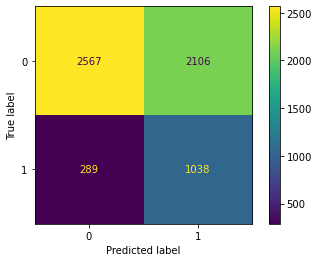

In [125]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='smote')
xgb_best.fit(X_train,y_train)
predictions = xgb_best.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
plot_confusion_matrix(xgb_best,X_test,y_test)

# adaboost

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [138]:
clf_ada = AdaBoostClassifier()

ROC_AUC -  0.9051503473668034


[[3821  852]
 [ 595  732]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4673
           1       0.46      0.55      0.50      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.78      0.76      0.77      6000



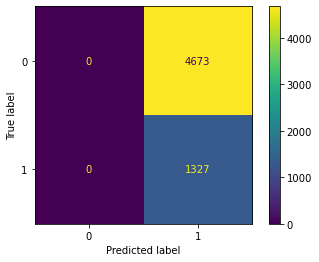

In [139]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='smote')
clf_ada.fit(X_train,y_train)
predictions = clf_ada.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

In [140]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='random_os')
clf_ada.fit(X_train,y_train)
predictions = clf_ada.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.8362605864683494


[[3707  966]
 [ 512  815]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4673
           1       0.46      0.61      0.52      1327

    accuracy                           0.75      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.75      0.77      6000



In [141]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced=False)
clf_ada.fit(X_train,y_train)
predictions = clf_ada.predict(X_test)
scores = cross_val_score(xgb_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.7786124530886562


[[4472  201]
 [ 891  436]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.68      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [143]:
para_grid = {'n_estimators': [100,200],'learning_rate':[0.001,0.01,0.1,0.2,0.5]}

In [145]:
ada_best = GridSearchCV(AdaBoostClassifier(),param_grid=para_grid)
ada_best.fit(X_train, y_train)
ada_best.best_estimator_
ada_best.score

<bound method BaseSearchCV.score of GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200]})>

In [146]:
ada_best.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [147]:
adaa_best = AdaBoostClassifier(**ada_best.best_params_)

In [148]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=True,balanced='random_os')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.6869884995988231


[[3999  674]
 [ 639  688]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4673
           1       0.51      0.52      0.51      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000



In [160]:
X_train,X_test,y_train,y_test = Scale_Split_Balance(df,features_1,target='DEF_PAY_NMO',scaled=False,balanced='smote')
adaa_best.fit(X_train,y_train)
predictions = adaa_best.predict(X_test)
scores = cross_val_score(adaa_best, X_train, y_train, scoring ="roc_auc", cv = 5)
scores = np.mean(scores)
print("ROC_AUC - ",scores)
print('\n')

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(xgb_best,X_test,y_test)

ROC_AUC -  0.6882070345935842


[[3946  727]
 [ 604  723]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4673
           1       0.50      0.54      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.79      0.78      0.78      6000



# Confusion matrices

Text(0.5, 1.0, 'AdaBoost')

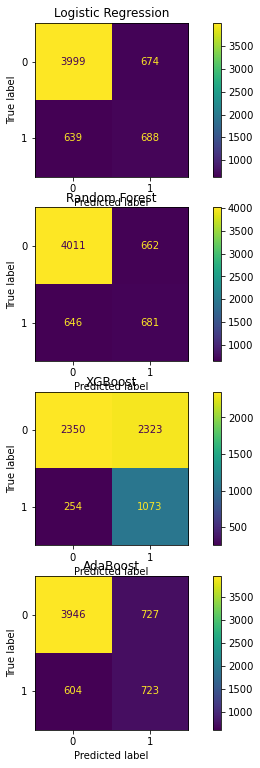

In [161]:
# Plot confusion matrix of 4 models

fig,ax=plt.subplots(4,1, figsize=(9,13))

plot_confusion_matrix(lr_best, X_test, y_test, ax = ax[0], values_format="d")
ax[0].set_title("Logistic Regression")



plot_confusion_matrix(rf_best, X_test, y_test, ax = ax[1], values_format="d")
ax[1].set_title("Random Forest")


plot_confusion_matrix(xgb_best, X_test, y_test, ax = ax[2], values_format="d")
ax[2].set_title("XGBoost")


plot_confusion_matrix(adaa_best, X_test, y_test, ax = ax[3], values_format="d")
ax[3].set_title("AdaBoost")


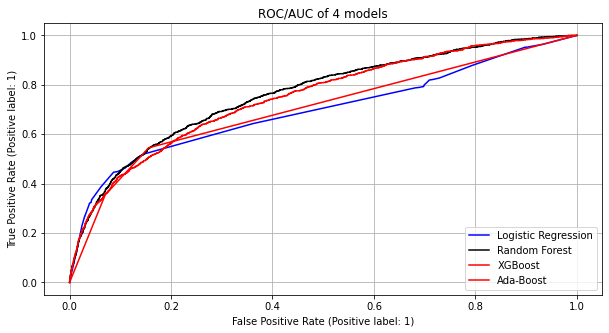

In [163]:
# Plot ROC_AUC curve of 4 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(lr_best, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(rf_best, X_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(xgb_best, X_test, y_test,ax=ax, color="red",label='XGBoost')
plot_roc_curve(adaa_best, X_test, y_test,ax=ax, color="red",label='Ada-Boost')
plt.title('ROC/AUC of 4 models')
plt.grid()

NameError: name 'Ada_best' is not defined

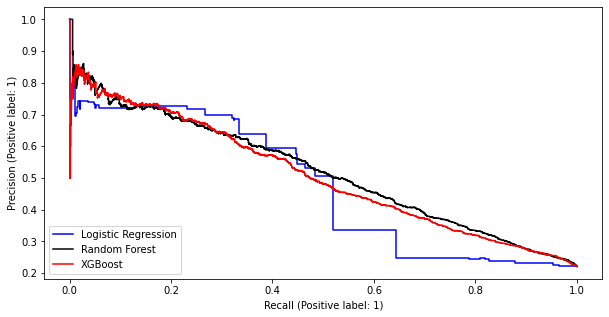

In [164]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(lr_best, X_test, y_test, ax=ax,color="blue",label='Logistic Regression')
plot_precision_recall_curve(rf_best, X_test, y_test, ax=ax,color="black",label='Random Forest')
plot_precision_recall_curve(xgb_best, X_test, y_test, ax=ax,color="red",label='XGBoost')
plot_precision_recall_curve(Ada_best, X_test, y_test, ax=ax,color="red",label='Ada-boost')
plt.title('Precision_Recall of 4 models')
plt.grid()

Text(0.5, 1.0, 'Features importance')

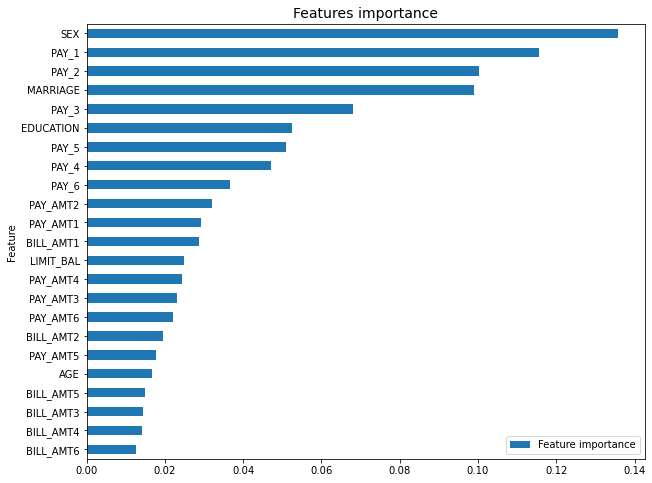

In [166]:
# Plot feature importance of winner model - Random Forest

fea_df = pd.DataFrame({'Feature': features_1, 'Feature importance': xgb_best.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,8))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)